In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
base_site = 'https://books.toscrape.com/'

In [3]:
response = requests.get(base_site)

In [4]:
response

<Response [200]>

In [5]:
html = response.content

In [6]:
# html

In [7]:
soup  = BeautifulSoup(html, 'html.parser')

In [8]:
# soup

# Extracting Books name

In [9]:
Book_names = []
for i in soup.find_all('h3'):
    Book_names.append(i.text)

In [10]:
# Book_names

# Extracting Rating

In [11]:
rat = soup.find_all(class_ = 'star-rating')

In [42]:
# rat

In [45]:
rating = []
for i in rat:
    rating.append(str(i))

In [46]:
rating

['<p class="star-rating Three">\n<i class="icon-star"></i>\n<i class="icon-star"></i>\n<i class="icon-star"></i>\n<i class="icon-star"></i>\n<i class="icon-star"></i>\n</p>',
 '<p class="star-rating One">\n<i class="icon-star"></i>\n<i class="icon-star"></i>\n<i class="icon-star"></i>\n<i class="icon-star"></i>\n<i class="icon-star"></i>\n</p>',
 '<p class="star-rating One">\n<i class="icon-star"></i>\n<i class="icon-star"></i>\n<i class="icon-star"></i>\n<i class="icon-star"></i>\n<i class="icon-star"></i>\n</p>',
 '<p class="star-rating Four">\n<i class="icon-star"></i>\n<i class="icon-star"></i>\n<i class="icon-star"></i>\n<i class="icon-star"></i>\n<i class="icon-star"></i>\n</p>',
 '<p class="star-rating Five">\n<i class="icon-star"></i>\n<i class="icon-star"></i>\n<i class="icon-star"></i>\n<i class="icon-star"></i>\n<i class="icon-star"></i>\n</p>',
 '<p class="star-rating One">\n<i class="icon-star"></i>\n<i class="icon-star"></i>\n<i class="icon-star"></i>\n<i class="icon-star

In [39]:
ratings = []
for i in rating:
    ratings.append(i.split('"')[1].split(" ")[1])

In [37]:
# ratings

[['<p class=',
  'star-rating Three',
  '>\n<i class=',
  'icon-star',
  '></i>\n<i class=',
  'icon-star',
  '></i>\n<i class=',
  'icon-star',
  '></i>\n<i class=',
  'icon-star',
  '></i>\n<i class=',
  'icon-star',
  '></i>\n</p>'],
 ['<p class=',
  'star-rating One',
  '>\n<i class=',
  'icon-star',
  '></i>\n<i class=',
  'icon-star',
  '></i>\n<i class=',
  'icon-star',
  '></i>\n<i class=',
  'icon-star',
  '></i>\n<i class=',
  'icon-star',
  '></i>\n</p>'],
 ['<p class=',
  'star-rating One',
  '>\n<i class=',
  'icon-star',
  '></i>\n<i class=',
  'icon-star',
  '></i>\n<i class=',
  'icon-star',
  '></i>\n<i class=',
  'icon-star',
  '></i>\n<i class=',
  'icon-star',
  '></i>\n</p>'],
 ['<p class=',
  'star-rating Four',
  '>\n<i class=',
  'icon-star',
  '></i>\n<i class=',
  'icon-star',
  '></i>\n<i class=',
  'icon-star',
  '></i>\n<i class=',
  'icon-star',
  '></i>\n<i class=',
  'icon-star',
  '></i>\n</p>'],
 ['<p class=',
  'star-rating Five',
  '>\n<i class=',
  

# Extracting Price

In [17]:
price = []
for i in soup.find_all(class_='price_color'):
    price.append(i.text)

In [18]:
# price

# Extracting Stocks

In [19]:
stocks= []
for i in soup.find_all(class_ = 'instock availability'):
    stocks.append(i.text.strip())

In [20]:
# stocks

# Make dataframe for it

In [21]:
data = {'Books':Book_names,'Rating':ratings,'Price':price,'Stocks':stocks}

In [22]:
df = pd.DataFrame(data)

In [23]:
df

,Books,Rating,Price,Stocks
0,A Light in the ...,Three,£51.77,In stock
1,Tipping the Velvet,One,£53.74,In stock
2,Soumission,One,£50.10,In stock
3,Sharp Objects,Four,£47.82,In stock
4,Sapiens: A Brief History ...,Five,£54.23,In stock
5,The Requiem Red,One,£22.65,In stock
6,The Dirty Little Secrets ...,Four,£33.34,In stock
7,The Coming Woman: A ...,Three,£17.93,In stock
8,The Boys in the ...,Four,£22.60,In stock
9,The Black Maria,One,£52.15,In stock


# Generating Bar Chart

In [24]:
df['Price'] = df['Price'].str.strip('£').astype(float)

In [25]:
# df['Price']

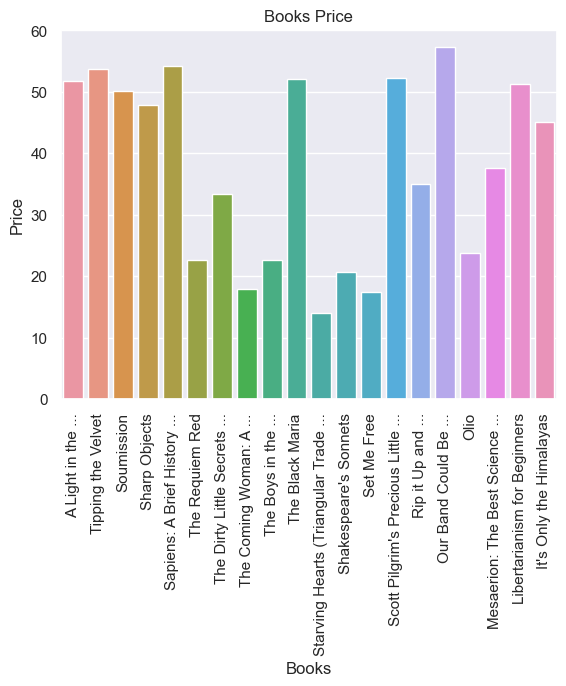

In [26]:
sns.set_theme()
plt.title('Books Price')
g = sns.barplot(data = df, x = 'Books',y = 'Price')
plt.xticks(rotation = 90)
plt.show()